In [ ]:
# Cấu hình thư viện cần thiết để xử lý data
import nltk
nltk.download('all')
import re
from nltk.corpus import wordnet

In [ ]:
# xây dựng danh sách các từ khoá chính cần tìm kiếm và các từ đồng nghĩa
list_words=['hello','timings']
list_syn={}
for word in list_words:
    synonyms=[]
    for syn in wordnet.synsets(word):
        for lem in syn.lemmas():
            # Xoá tất cả các ký tự đặc biệt (nếu có) từ những từ đồng nghĩa
            lem_name = re.sub('[^a-zA-Z0-9 \n\.]', ' ', lem.name())
            synonyms.append(lem_name)
    list_syn[word]=set(synonyms)
print (list_syn)

{'hello': {'howdy', 'how do you do', 'hi', 'hullo', 'hello'}, 'timings': {'timing', 'time', 'clock'}}


In [ ]:
{'hello': {'howdy', 'how do you do', 'hi', 'hullo', 'hello'}, 'timings': {'timing', 'time', 'clock'}}

{'hello': {'hello', 'hi', 'how do you do', 'howdy', 'hullo'},
 'timings': {'clock', 'time', 'timing'}}

{'hello': {'howdy', 'how do you do', 'hi', 'hullo', 'hello'}, 'timings': {'timing', 'time', 'clock'}}


In [ ]:
# Xây dụng dictionary lưu trữ intent và từ khoá tìm kiếm (key words)
keywords={}
keywords_dict={}
# định nghĩa ditionary lưu trữ danh sách keywords và reglular expression tương ứng phục vụ việc tìm kiếm
#định nghĩa từ khoá thứ nhất
keywords['greet']=[] 
for synonym in list(list_syn['hello']):
    keywords['greet'].append('.*\\b'+synonym+'\\b.*')

#định nghĩa từ khoá thứ hai
keywords['timings']=[]
for synonym in list(list_syn['timings']):
    keywords['timings'].append('.*\\b'+synonym+'\\b.*')

print(keywords)

{'greet': ['.*\\bhowdy\\b.*', '.*\\bhow do you do\\b.*', '.*\\bhi\\b.*', '.*\\bhullo\\b.*', '.*\\bhello\\b.*'], 'timings': ['.*\\btiming\\b.*', '.*\\btime\\b.*', '.*\\bclock\\b.*']}


In [ ]:
#Định nghĩa dictionary lưu trữ intent và expression tương ứng sử dụng OR (|) operator
for intent, keys in keywords.items():
    keywords_dict[intent]=re.compile('|'.join(keys))
print (keywords_dict)

{'greet': re.compile('.*\\bhowdy\\b.*|.*\\bhow do you do\\b.*|.*\\bhi\\b.*|.*\\bhullo\\b.*|.*\\bhello\\b.*'), 'timings': re.compile('.*\\btiming\\b.*|.*\\btime\\b.*|.*\\bclock\\b.*')}


In [ ]:
{'greet': re.compile('.*\\bhowdy\\b.*|.*\\bhow do you do\\b.*|.*\\bhi\\b.*|.*\\bhullo\\b.*|.*\\bhello\\b.*'),
 'timings': re.compile('.*\\btiming\\b.*|.*\\btime\\b.*|.*\\bclock\\b.*')}


{'greet': re.compile(r'.*\bhowdy\b.*|.*\bhow do you do\b.*|.*\bhi\b.*|.*\bhullo\b.*|.*\bhello\b.*',
 re.UNICODE),
 'timings': re.compile(r'.*\btiming\b.*|.*\btime\b.*|.*\bclock\b.*',
 re.UNICODE)}

In [ ]:
# Định nghĩa dictionary cần thiết để lưu trữ câu trả lời theo intent
responses={
    'greet':'Hello! How can I help you?',
    'timings':'We are open from 9AM to 5PM, Monday to Friday. We are closed on weekends and public holidays.',
    'unknown':'I dont quite understand. Could you repeat that?',
}

In [ ]:
print ("Chào mừng bạn đến với ngân Hàng ABC (Alway be Courious)")
while (True):  
    # lấy dữ liệu đầu vào từ người sử dụng
    user_input = input("Please enter your question: ").lower()
    # xác định điều kiện dừng chatbot
    if user_input == 'quit': 
        print ("Cảm ơn bạn đã sử dụng chương trình.")
        break    
    matched_intent = None 
    for intent,pattern in keywords_dict.items():
        # Sử dụng regular expression để tìm kiếm keywords từ dữ liệu đầu vào
        if re.search(pattern, user_input): 
            matched_intent=intent  

    key='unknown' 
    if matched_intent in responses:
        key = matched_intent
    # Xuất câu trả lời cho người dùng
    print ("Rule-based chatbot: ", responses[key]) 

Chào mừng bạn đến với ngân Hàng ABC (Alway be Courious)
Rule-based chatbot:  Hello! How can I help you?
Rule-based chatbot:  We are open from 9AM to 5PM, Monday to Friday. We are closed on weekends and public holidays.


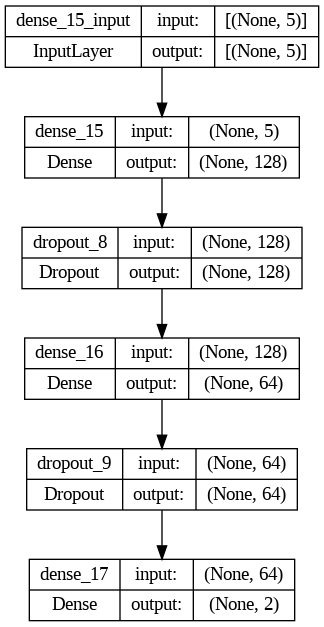

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import SGD
from keras.utils.vis_utils import plot_model


model = Sequential()
model.add(Dense(128, input_shape=(5,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)